In [1]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import seaborn as sns

alg_name:  UCRL2 mean reward:  2495.2 std:  104.32430205853285
[2616 2578 2254 2442 2430 2468 2561 2446 2559 2598]
alg_name:  UCRL2-VTR mean reward:  2524.9 std:  117.91984565797226
[2430 2605 2639 2527 2411 2558 2365 2395 2565 2754]
alg_name:  Optimal Policy mean reward:  2660.2 std:  63.19936708543844
[2603 2604 2640 2619 2678 2647 2689 2630 2661 2831]


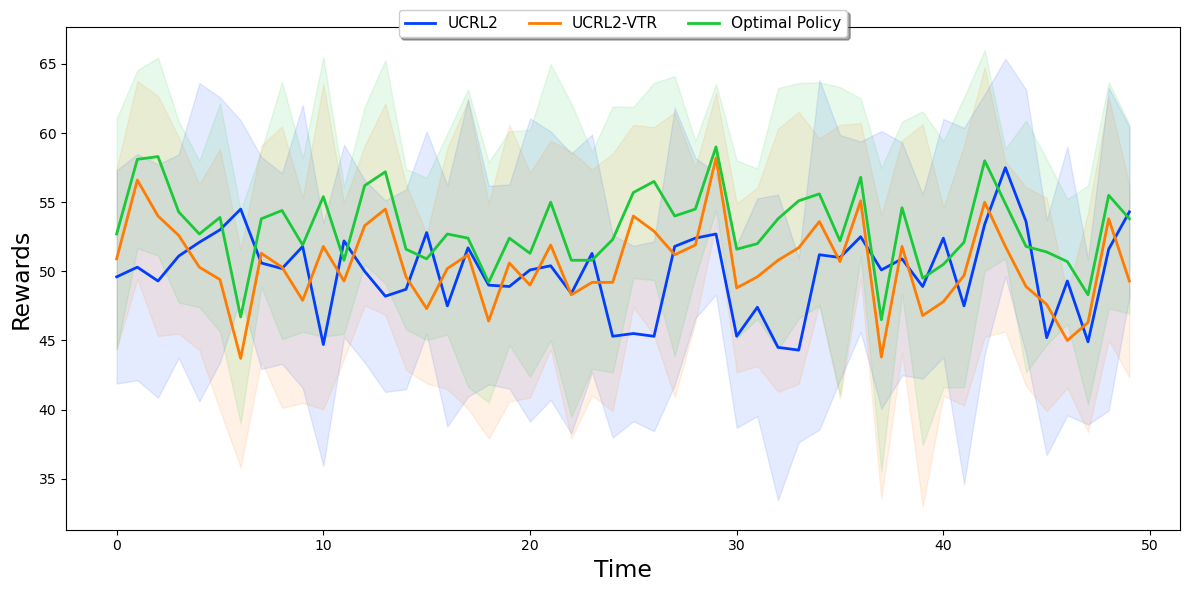

In [ ]:
# Experiments Information
T = 5000

algo_list = ['UCRL2', 'UCRL2-VTR', 'Optimal Policy']
# algo_list = ['UCRL2', 'UCMNLK', 'UCRL2-VTR', 'Optimal Policy']
colors = sns.color_palette('bright', n_colors=len(algo_list))
# line_styles = ['--', '-', '-.', '--']
# markers = ['.', 's', '^', '.']


# plt.figure()
plt.figure(figsize=(12, 6))

plt.rc('font', size=10)        # 기본 폰트 크기
plt.rc('axes', labelsize=17)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=11)  # 범례 폰트 크기
# plt.rc('figure', titlesize=50) # figure title 폰트 크기

    
for i in range(len(algo_list)):
    algo_avg = []
    algo_var = []
    
    directory = './data/hardtolearn/T=' + str(T) + '/' + str(algo_list[i])
    file_list = listdir(directory)
    if '.DS_Store' in file_list:
        file_list.remove('.DS_Store')
    if '.ipynb_checkpoints' in file_list:
        file_list.remove('.ipynb_checkpoints')

    algo_data = []
    for j in range(len(file_list)):
        r = np.load(directory + '/' + 'return' + str(j) + '.npy', allow_pickle=True)
        algo_data.append(r)

    # print(algo_data)
    # data_mean = np.mean(algo_data, axis=0)
    # data_std = np.std(algo_data, axis=0)
        
    unit = 100
    unit_reward = []
    for a in range(len(algo_data)):
        tmp_arr = []
        for b in range(0, T, unit):
            tmp_value = sum(algo_data[a][b:b+unit])
            tmp_arr.append(tmp_value)
        unit_reward.append(tmp_arr)

    data_mean = np.mean(unit_reward, axis=0)
    data_std = np.std(unit_reward, axis=0)

    data_length = np.arange(len(data_mean))
    # print(len(unit_length), len(unit_reward))

    plt.fill_between(data_length, data_mean + data_std, data_mean - data_std, alpha=0.1, edgecolor=colors[i],
                facecolor=colors[i])
    plt.plot(data_length, data_mean, color=colors[i], linewidth=2.0, label=algo_list[i])
    
    #linestyle=line_styles[i], label=algo_list[i], marker=markers[i], markevery=1, markersize=5)


    print("alg_name: ", algo_list[i], "mean reward: ", np.mean(np.sum(unit_reward, axis=1)), "std: ", np.std(np.sum(unit_reward, axis=1)))
    # print(np.sum(unit_reward, axis=1))   
    # print(algo_list[i], ": ", f'{np.round(sum(data_mean), 2)}', f'{np.round(sum(data_std), 2)}')
    # print('regret', ": ", f'{np.round(regret, 2)}')
            

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 1, 2]
plt.legend([handles[i] for i in order], [labels[i] for i in order], loc='upper center', bbox_to_anchor=(0.5, 1.05),
        fancybox=True, shadow=True, ncol=3)

# plt.legend()
# plt.title("hardtolearn: nState=" + str(nState) + ", T=" + str(T), y=-0.3)
# plt.xticks([500, 1000, 1500, 2000, 2500, 3000])
plt.xlabel("Time")
plt.ylabel("Rewards")
# plt.ylim([35, 65])
# plt.xlim([0, 1000])

# plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('hardtolearn Regret' +'.pdf')
# plt.savefig('./S=' + str(nState) + '_ns.pdf')
plt.show()